In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import (classification_report,
                            accuracy_score,
                            confusion_matrix,
                            roc_auc_score,
                            roc_curve,
                            auc, 
                            r2_score,
                            mean_squared_error,
                            mean_absolute_error,
                            f1_score, 
                            precision_score,
                            recall_score, 
                            log_loss, 
                            matthews_corrcoef, 
                            cohen_kappa_score, 
                            balanced_accuracy_score, 
                            jaccard_score, 
                            fbeta_score, 
                            hamming_loss, 
                            zero_one_loss, 
                            explained_variance_score, 
                            mean_absolute_percentage_error)

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\KIIT\Downloads\USA_Housing.csv")

In [3]:
# For demonstration, let's predict 'Address' is not suitable (it's non-numeric and unique), 
# so let's predict 'Price' as a classification problem by binning it.
# Create a price category: 0 = below median, 1 = above median
median_price = data['Price'].median()
data['PriceCategory'] = (data['Price'] > median_price).astype(int)

In [4]:
# Features and target
X = data.drop(['Price', 'Address', 'PriceCategory'], axis=1)
y = data['PriceCategory']

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Naive Bayes classifier
nb = GaussianNB()

# Model Fitting
nb.fit(X_train, y_train)

GaussianNB()

In [7]:
# Model Prediction
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

In [8]:
# Model Training Report
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2021
           1       0.89      0.89      0.89      1979

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



In [9]:
# Model Test Report
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       479
           1       0.89      0.88      0.89       521

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



In [10]:
# Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.892
Test Accuracy: 0.884


In [11]:
print("Confusion Matrix (Training):\n", confusion_matrix(y_train, y_pred_train))
print("Confusion Matrix(Test):\n", confusion_matrix(y_test, y_pred_test))

Confusion Matrix (Training):
 [[1802  219]
 [ 213 1766]]
Confusion Matrix(Test):
 [[424  55]
 [ 61 460]]


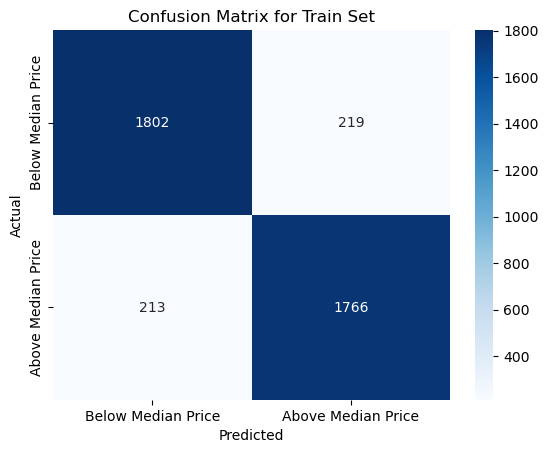

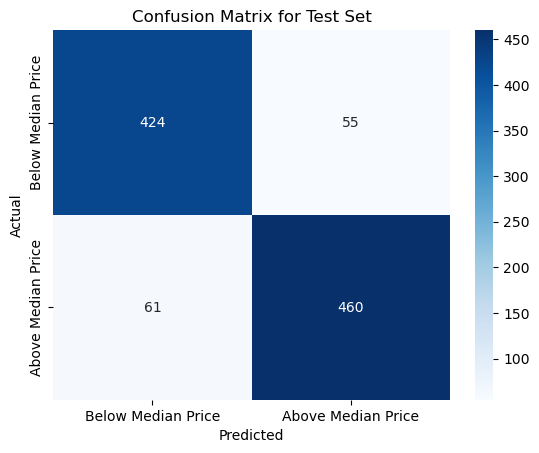

In [12]:
# Plotting confusion matrix for better visualization

sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Median Price', 'Above Median Price'],
            yticklabels=['Below Median Price', 'Above Median Price'])
plt.title('Confusion Matrix for Train Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Median Price', 'Above Median Price'],
            yticklabels=['Below Median Price', 'Above Median Price'])
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

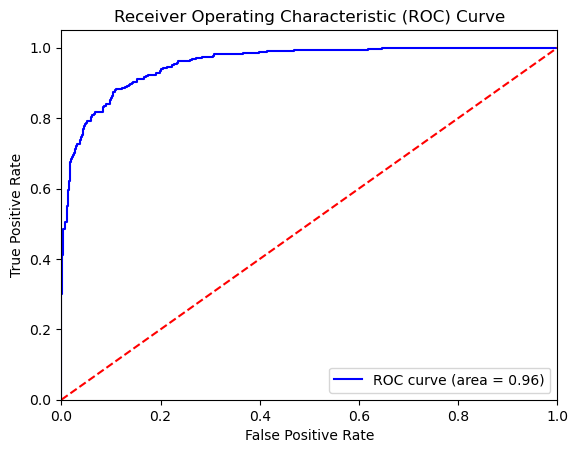

In [13]:
# Calculate ROC curve and AUC for the test set
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
# Additional metrics
print("ROC AUC Score:", roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1]))
print("R2 Score:", r2_score(y_test, y_pred_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("Precision Score:", precision_score(y_test, y_pred_test))
print("Recall Score:", recall_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, nb.predict_proba(X_test)[:, 1]))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test))
print("Cohen's Kappa Score:", cohen_kappa_score(y_test, y_pred_test))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred_test))
print("Jaccard Score:", jaccard_score(y_test, y_pred_test))
print("F-beta Score (beta=1):", fbeta_score(y_test, y_pred_test, beta=1))
print("Hamming Loss:", hamming_loss(y_test, y_pred_test))
print("Zero-One Loss:", zero_one_loss(y_test, y_pred_test))
print("Explained Variance Score:", explained_variance_score(y_test, y_pred_test))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred_test))


ROC AUC Score: 0.9560023882128075
R2 Score: 0.5351800576216446
Mean Squared Error: 0.116
Mean Absolute Error: 0.116
F1 Score: 0.888030888030888
Precision Score: 0.8932038834951457
Recall Score: 0.8829174664107485
Log Loss: 0.34272790419699467
Matthews Correlation Coefficient: 0.7677627316956517
Cohen's Kappa Score: 0.7677073112121273
Balanced Accuracy Score: 0.8840474597189443
Jaccard Score: 0.7986111111111112
F-beta Score (beta=1): 0.888030888030888
Hamming Loss: 0.116
Zero-One Loss: 0.11599999999999999
Explained Variance Score: 0.5353243120865205
Mean Absolute Percentage Error: 247697979505377.3


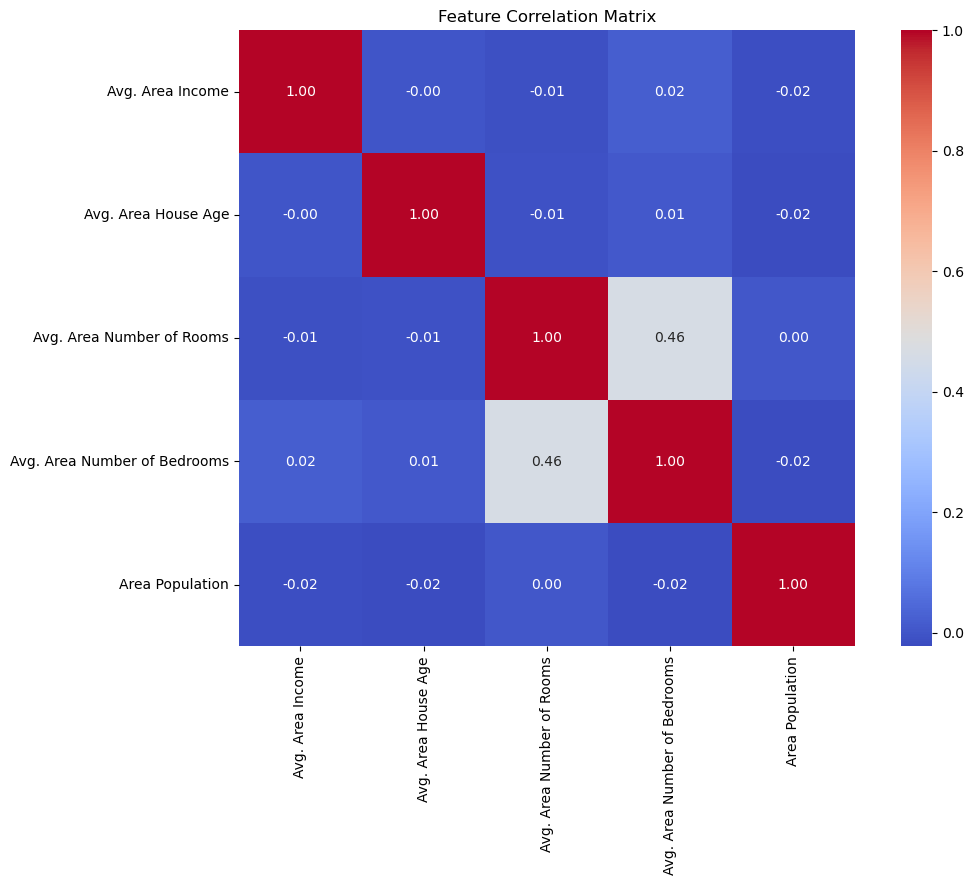

In [15]:
# Correlation matrix for features
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

Confidence Interval for Predictions: [0.48, 0.55]


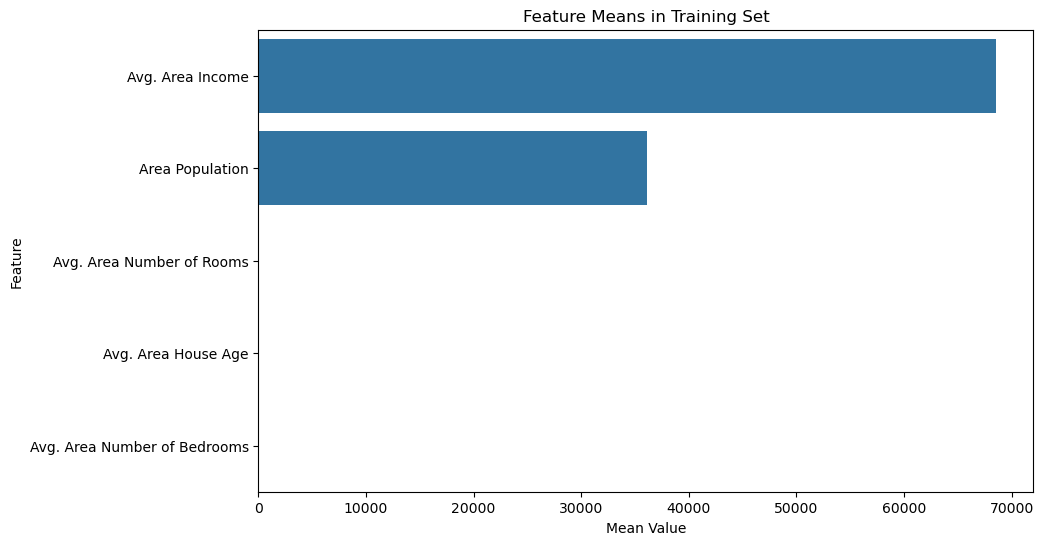

In [16]:
# Confidence intervals for predictions
import numpy as np
def confidence_intervals(predictions, confidence=0.95):
    mean = np.mean(predictions)
    std_dev = np.std(predictions)
    z_score = 1.96  # for 95% confidence
    margin_of_error = z_score * (std_dev / np.sqrt(len(predictions)))
    return mean - margin_of_error, mean + margin_of_error
lower, upper = confidence_intervals(y_pred_test)
print(f"Confidence Interval for Predictions: [{lower:.2f}, {upper:.2f}]")
# Feature importance using Naive Bayes is not straightforward, but we can look at the means of the features
feature_means = pd.DataFrame(X_train.mean()).reset_index()
feature_means.columns = ['Feature', 'Mean']
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean', y='Feature', data=feature_means.sort_values(by='Mean', ascending=False))
plt.title('Feature Means in Training Set')
plt.xlabel('Mean Value')
plt.ylabel('Feature')
plt.show()


In [ ]:
# MultinomialNB expects non-negative feature values, so we need to ensure all values are >= 0
# Shift features if necessary
X_train_nonneg = X_train - X_train.min()
X_test_nonneg = X_test - X_train.min()

mnb = MultinomialNB()
mnb.fit(X_train_nonneg, y_train)

y_pred_train_mnb = mnb.predict(X_train_nonneg)
y_pred_test_mnb = mnb.predict(X_test_nonneg)

print("MultinomialNB Training Classification Report:")
print(classification_report(y_train, y_pred_train_mnb))
print("MultinomialNB Test Classification Report:")
print(classification_report(y_test, y_pred_test_mnb))

MultinomialNB Training Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52      2021
           1       0.52      0.52      0.52      1979

    accuracy                           0.52      4000
   macro avg       0.52      0.52      0.52      4000
weighted avg       0.52      0.52      0.52      4000

MultinomialNB Test Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       479
           1       0.52      0.50      0.51       521

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



In [20]:
# Binarize the features for BernoulliNB (using median as threshold for each feature)
X_train_bin = (X_train > X_train.median()).astype(int)
X_test_bin = (X_test > X_train.median()).astype(int)

bnb = BernoulliNB()
bnb.fit(X_train_bin, y_train)

y_pred_train_bnb = bnb.predict(X_train_bin)
y_pred_test_bnb = bnb.predict(X_test_bin)

print("BernoulliNB Training Classification Report:")
print(classification_report(y_train, y_pred_train_bnb))
print("BernoulliNB Test Classification Report:")
print(classification_report(y_test, y_pred_test_bnb))

BernoulliNB Training Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      2021
           1       0.79      0.78      0.78      1979

    accuracy                           0.79      4000
   macro avg       0.79      0.79      0.79      4000
weighted avg       0.79      0.79      0.79      4000

BernoulliNB Test Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       479
           1       0.82      0.73      0.77       521

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.77      1000
weighted avg       0.78      0.78      0.77      1000

